In [1]:
#Add magic command
%matplotlib inline

#import dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#read the files
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178
4,South Jack,3/6/2019 4:28,34.58,3908451377344
5,South Latoya,3/11/2019 12:26,9.52,1994999424437
6,New Paulville,2/27/2019 11:17,43.25,793208410091
7,Simpsonburgh,4/26/2019 0:43,35.98,111953927754
8,South Karenland,1/8/2019 3:28,35.09,7995623208694
9,North Jasmine,3/9/2019 6:26,42.81,5327642267789


In [5]:
#get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#get the columns and rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#get unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#get number of data points from the urban cities
sum(city_data_df["type"]=="Urban")

66

In [10]:
#get number of data points from the Suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [11]:
#get number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [12]:
#get the columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
#get the columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
#get data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
#combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#display dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [16]:
#create urban city dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [17]:
#create suburban and rural city dataframe
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1076079536213,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1985256326182,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4018025271936,2,Rural


In [18]:
#get number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
#get number of rides for suburban and rural cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [21]:
#get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
#get average fare for each city in the suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [24]:
#get average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [25]:
#get average number of drivers for each suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

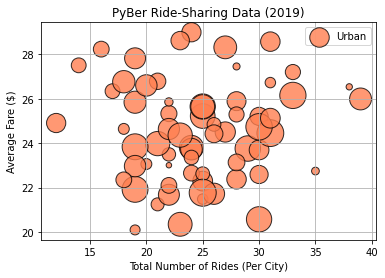

In [28]:
#matlab method
#build scatter plots for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, color="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban", s=10*urban_driver_count)

#create labels
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

#create title
plt.title("PyBer Ride-Sharing Data (2019)")

#add grid
plt.grid(True)

#add legend
plt.legend()

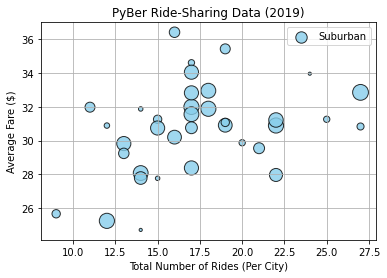

In [29]:
#build scatter plots for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, color="skyblue", edgecolor="black", linewidths=1, alpha=0.8, 
            label="Suburban", s=10*suburban_driver_count)

#create labels
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

#create title
plt.title("PyBer Ride-Sharing Data (2019)")

#add grid
plt.grid(True)

#add legend
plt.legend()

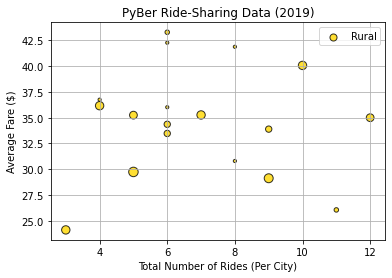

In [30]:
#build scatter plots for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, color="gold", edgecolor="black", linewidths=1, alpha=0.8, 
            label="Rural", s=10*rural_driver_count)

#create labels
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

#create title
plt.title("PyBer Ride-Sharing Data (2019)")

#add grid
plt.grid(True)

#add legend
plt.legend()

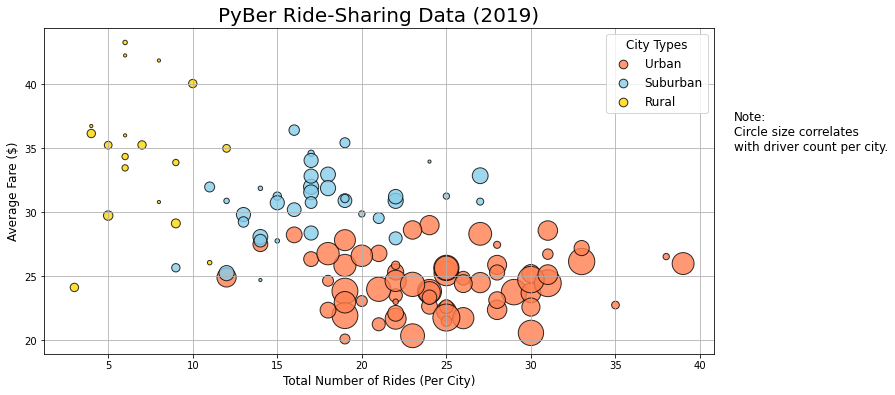

In [45]:
#add the scatter charts for each type of city
#enlarge the figure size
plt.subplots(figsize=(10,6))

#plot the scatter
plt.scatter(urban_ride_count, urban_avg_fare, color="coral", edgecolor="black", linewidths=1, alpha=0.8, 
            label="Urban", s=10*urban_driver_count)
plt.scatter(suburban_ride_count, suburban_avg_fare, color="skyblue", edgecolor="black", linewidths=1, alpha=0.8, 
            label="Suburban", s=10*suburban_driver_count)
plt.scatter(rural_ride_count, rural_avg_fare, color="gold", edgecolor="black", linewidths=1, alpha=0.8, 
            label="Rural", s=10*rural_driver_count)

#create labels with font size 12
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)

#create title with font size 20
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)

#add grid
plt.grid(True)

#create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#incorporate text label about circle size
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize=12, wrap=True, ha="left")

#save the figure
figure=plt.gcf()
figure.set_size_inches(12, 6)
plt.savefig("analysis/Fig1.png")

#show the plot
plt.show()